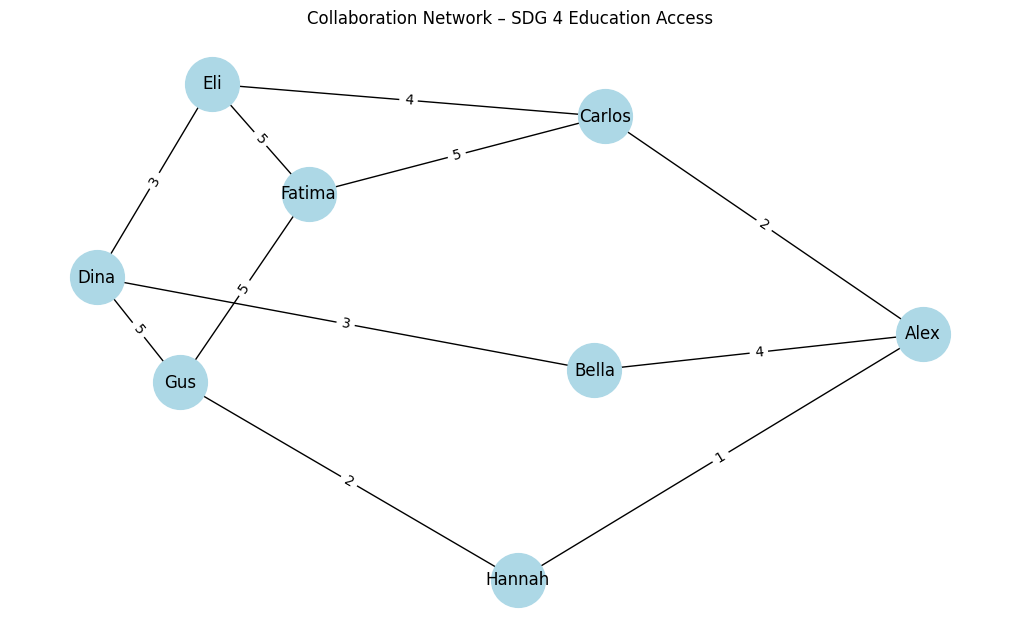

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("social_collaboration_network.csv")
df.head()
# Create graph from edges with weights
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['Person_A'], row['Person_B'], weight=row['Collaboration_Score'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Collaboration Network – SDG 4 Education Access")
plt.show()

In [10]:
for node in G.nodes():
    print(f"{node} has degree {G.degree(node)}")

# Centrality (who connects groups)
centrality = nx.betweenness_centrality(G, weight='weight')
print("\nBetweenness Centrality:")
for node, score in centrality.items():
    print(f"{node}: {round(score, 3)}")

# Clustering (tight-knit communities)
clustering = nx.clustering(G, weight='weight')
print("\nClustering Coefficients:")
for node, coeff in clustering.items():
    print(f"{node}: {round(coeff, 3)}")

Alex has degree 3
Bella has degree 2
Carlos has degree 3
Dina has degree 3
Eli has degree 3
Fatima has degree 3
Gus has degree 3
Hannah has degree 2

Betweenness Centrality:
Alex: 0.31
Bella: 0.048
Carlos: 0.167
Dina: 0.119
Eli: 0.119
Fatima: 0.0
Gus: 0.095
Hannah: 0.143

Clustering Coefficients:
Alex: 0
Bella: 0
Carlos: 0.309
Dina: 0
Eli: 0.309
Fatima: 0.309
Gus: 0
Hannah: 0


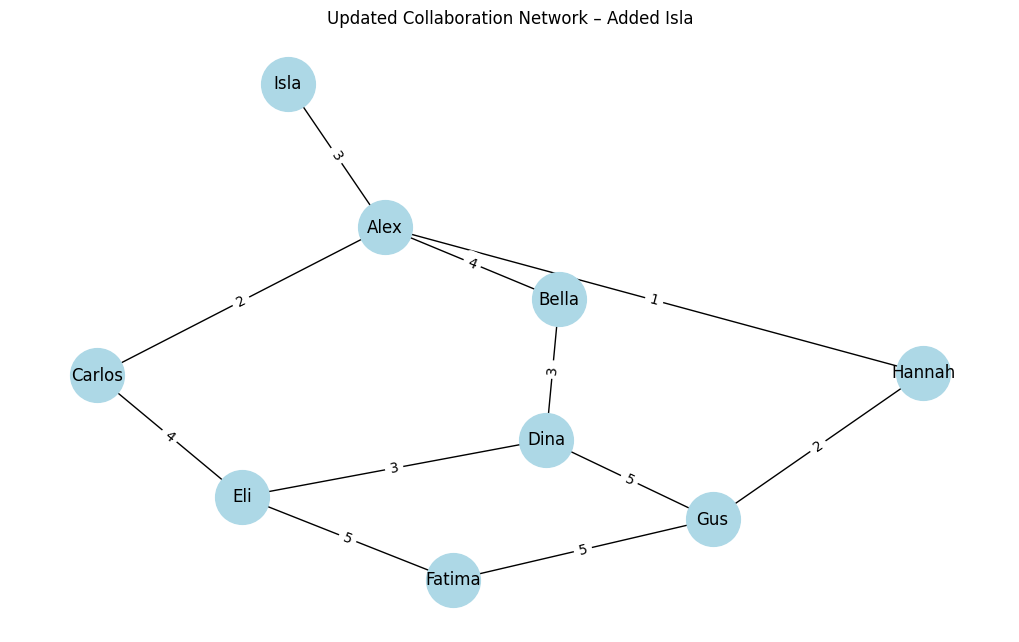

In [11]:
# Add new student Isla connected to Alex
G.add_edge("Isla", "Alex", weight=3)

G.remove_edge("Carlos", "Fatima")

# Recalculate layout (so Isla gets a position)
pos = nx.spring_layout(G, seed=42)

# Re-draw the updated graph
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Updated Collaboration Network – Added Isla")
plt.show()